In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("merged_wta_environmental_data_with_geo.csv")

# Basic info
df.info()

# Summary statistics for all numeric columns
summary_stats = df.describe()
display(summary_stats)

# Count missing values per column
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Correlation matrix (for numerical features only)
correlation_matrix = df.corr(numeric_only=True)
print("Correlation Matrix:\n", correlation_matrix)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 64 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Date_sb                                         1636 non-null   object 
 1   Date of Session                                 1636 non-null   object 
 2   Day of Session                                  1636 non-null   object 
 3   Month of Session                                1636 non-null   object 
 4   Numerical Value of Month                        1636 non-null   float64
 5   Year_sb                                         1636 non-null   float64
 6   Date_c                                          1636 non-null   object 
 7   Epoch                                           181 non-null    float64
 8   Date Reverse                                    1636 non-null   object 
 9   Week                                     

,Numerical Value of Month,Year_sb,Epoch,Week,Index,WBGT,Air Temperature (TA),Black Globe Temperature (Globe Temp),Relative Humidity_sb,AQI Reading_sb,...,Heat Reading Log - EWR Cause Change,Suspension/Change Match Date,Reason For Suspension/adaptation Of Start Time,Heat Stress Index,Air Temperature,Ground Temperature,Relative Humidity_catapult,AQI Reading_catapult,Latitude,Longitude
count,1636.000000,1636.000000,1.810000e+02,1636.000000,181.0,1569.000000,1460.000000,1459.000000,1455.000000,1124.000000,...,0.0,0.0,0.0,3671.000000,3597.000000,3595.000000,3591.000000,1779.000000,5353.000000,5353.000000
mean,6.918093,2023.998778,1.721082e+12,28.435208,1.0,22.562014,26.569589,33.455929,48.722749,37.038256,...,NaN,NaN,NaN,23.175982,27.452605,34.397141,45.904712,43.846037,32.166257,-5.111706
std,2.657288,0.034953,6.676887e+09,11.391185,0.0,5.151489,5.374613,8.575188,15.750395,22.580525,...,NaN,NaN,NaN,4.702973,9.933059,9.186118,20.002771,29.429765,22.685115,74.563346
min,2.000000,2023.000000,1.702250e+12,7.000000,1.0,6.500000,10.900000,11.700000,3.600000,0.000000,...,NaN,NaN,NaN,2.100000,1.000000,2.100000,0.100000,0.000000,-42.882509,-123.113952
25%,5.000000,2024.000000,1.716600e+12,20.000000,1.0,18.800000,22.775000,26.600000,38.700000,21.000000,...,NaN,NaN,NaN,19.900000,23.600000,27.300000,34.000000,27.000000,25.774173,-77.036543
50%,7.000000,2024.000000,1.721950e+12,29.000000,1.0,22.400000,26.400000,32.900000,48.400000,33.000000,...,NaN,NaN,NaN,23.200000,27.100000,34.400000,45.200000,39.000000,39.101454,1.107613
75%,9.000000,2024.000000,1.725670e+12,37.000000,1.0,26.200000,30.300000,40.150000,58.600000,52.000000,...,NaN,NaN,NaN,26.600000,30.700000,41.200000,56.200000,56.000000,46.050027,19.146094
max,12.000000,2024.000000,1.735600e+12,52.000000,1.0,43.200000,49.100000,56.000000,98.000000,149.000000,...,NaN,NaN,NaN,50.400000,311.000000,231.000000,567.000000,188.000000,56.426789,174.763180


Missing values:
 Date_sb                     3717
Date of Session             3717
Day of Session              3717
Month of Session            3717
Numerical Value of Month    3717
                            ... 
event-uuid_catapult         1634
group-uuid_catapult         1634
City                           2
Latitude                       0
Longitude                      0
Length: 64, dtype: int64
Correlation Matrix:
                                                 Numerical Value of Month  \
Numerical Value of Month                                        1.000000   
Year_sb                                                        -0.066928   
Epoch                                                           0.930582   
Week                                                            0.994351   
Index                                                                NaN   
WBGT                                                            0.333968   
Air Temperature (TA)                      

In [4]:
missing_ratio = df.isnull().mean().sort_values(ascending=False)

# 2. Print full list of columns with missing values, sorted
print("🔍 Full Missing Value Report (sorted):")
print(missing_ratio[missing_ratio > 0])

# 3. Separate columns with:
all_missing_cols = missing_ratio[missing_ratio == 1.0].index.tolist()
mostly_missing_cols = missing_ratio[(missing_ratio > 0.5) & (missing_ratio < 1.0)].index.tolist()
moderately_missing_cols = missing_ratio[(missing_ratio > 0.1) & (missing_ratio <= 0.5)].index.tolist()

print(f"\n📌 Columns with 100% missing: {len(all_missing_cols)}")
print(f"📌 Columns with >50% missing: {len(mostly_missing_cols)}")
print(f"📌 Columns with 10–50% missing: {len(moderately_missing_cols)}")

# 4. Drop 100% missing columns
df_cleaned = df.drop(columns=all_missing_cols)
print(f"\n✅ Dropped {len(all_missing_cols)} columns with all null values.")

# 5. Save this cleaned version optionally
# df_cleaned.to_csv("wta_cleaned_for_eda.csv", index=False)

# 6. Quick look at numerical summary
print("\n📊 Numerical Summary:")
print(df_cleaned.describe())

# 7. Quick look at categorical columns (optional)
categorical_cols = df_cleaned.select_dtypes(include='object').columns.tolist()
print(f"\n🔤 Categorical columns: {categorical_cols}")
print(df_cleaned[categorical_cols].describe(include='all'))

🔍 Full Missing Value Report (sorted):
Suspension/Change Match Date                      1.000000
Reason For Suspension/adaptation Of Start Time    1.000000
Heat Reading Log - EWR Cause Change               1.000000
EWR - Suspension Or Change In Time                1.000000
End Date And Time                                 1.000000
                                                    ...   
End Date:                                         0.305249
Days Of Week                                      0.305249
Date And Time                                     0.305249
Tournament                                        0.000374
City                                              0.000374
Length: 62, dtype: float64

📌 Columns with 100% missing: 5
📌 Columns with >50% missing: 32
📌 Columns with 10–50% missing: 23

✅ Dropped 5 columns with all null values.

📊 Numerical Summary:
       Numerical Value of Month      Year_sb         Epoch         Week  \
count               1636.000000  1636.000000  1.

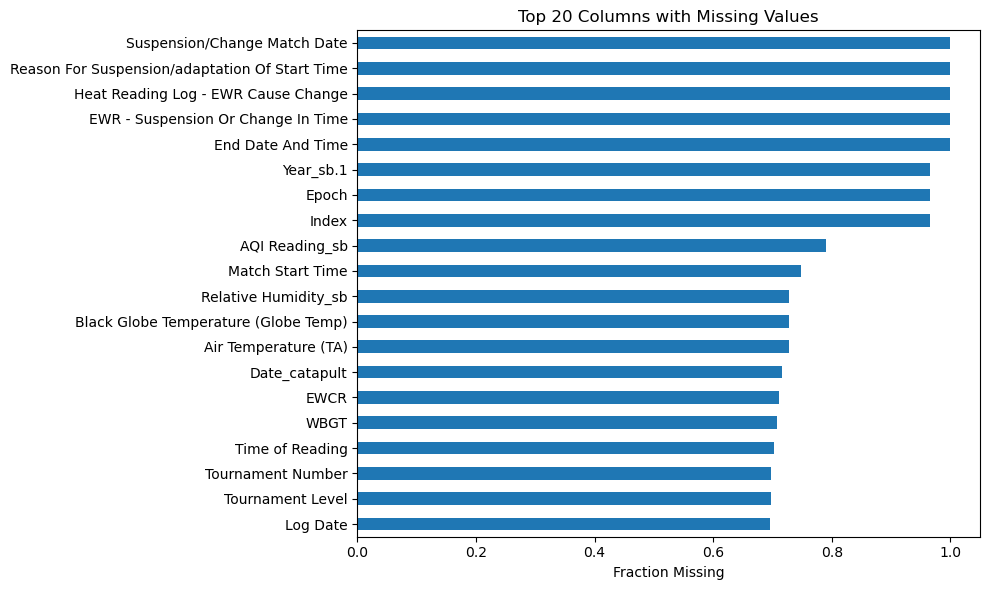

In [6]:
# Horizontal bar chart for top 20 missing columns
missing_ratio.head(20).plot(kind='barh', figsize=(10, 6), title='Top 20 Columns with Missing Values')
plt.xlabel('Fraction Missing')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

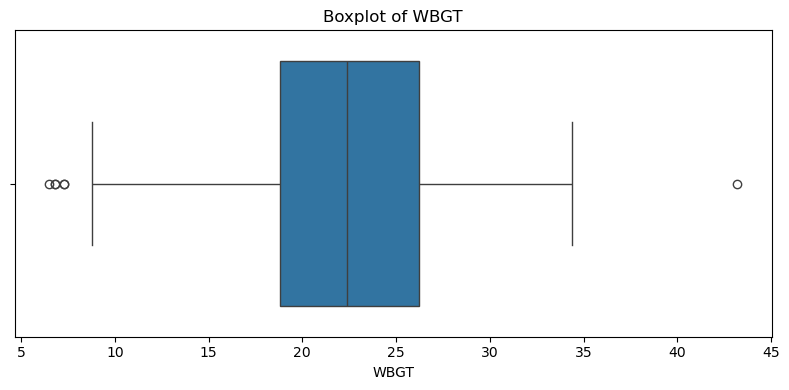

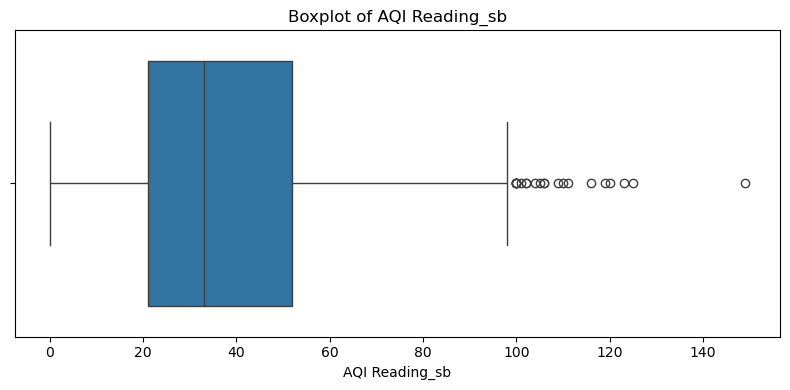

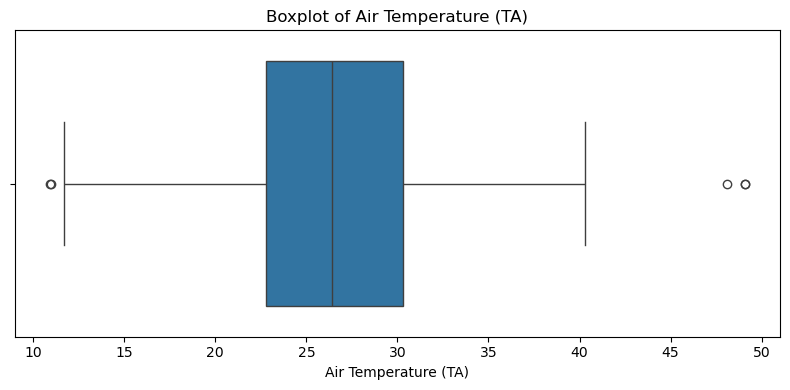

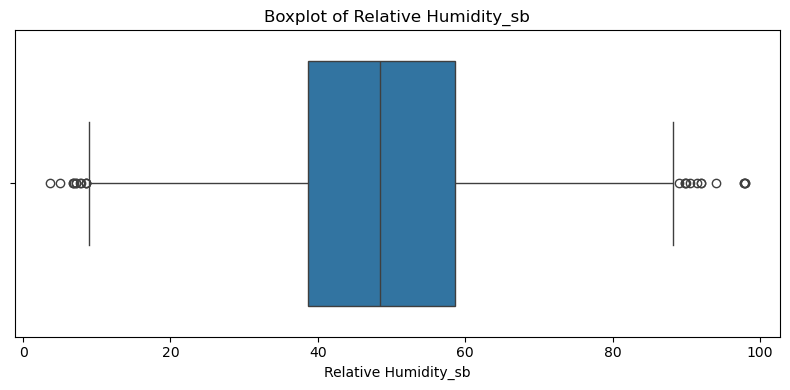

In [8]:
# Box plots for selected columns
import seaborn as sns

for col in ['WBGT', 'AQI Reading_sb', 'Air Temperature (TA)', 'Relative Humidity_sb']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_cleaned, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

In [9]:
city_summary = df_cleaned.groupby("City")[["WBGT", "AQI Reading_sb"]].mean().sort_values(by="WBGT", ascending=False)
display(city_summary.head(10))  # Top 10 cities by WBGT

,WBGT,AQI Reading_sb
City,,
BARRANQUILLA,30.978182,64.333333
HUA HIN,29.452174,28.956522
PALERMO,29.388462,56.222222
SANTA CRUZ,29.140000,42.523810
WASHINGTON DC,28.603333,52.500000
BUDAPEST,28.533333,58.111111
CALI,28.325000,9.437500
MERIDA,28.246154,47.076923
SEOUL,27.946667,38.071429


In [10]:
# 📊 2. Summary statistics by city: AQI and WBGT (mean and median)
city_summary = df.groupby("City").agg(
    Mean_AQI_sb=("AQI Reading_sb", "mean"),
    Median_AQI_sb=("AQI Reading_sb", "median"),
    Mean_AQI_catapult=("AQI Reading_catapult", "mean"),
    Median_AQI_catapult=("AQI Reading_catapult", "median"),
    Mean_WBGT=("WBGT", "mean"),
    Median_WBGT=("WBGT", "median")
).reset_index()

display(city_summary.sort_values("Mean_AQI_sb", ascending=False))

,City,Mean_AQI_sb,Median_AQI_sb,Mean_AQI_catapult,Median_AQI_catapult,Mean_WBGT,Median_WBGT
106,WUHAN,79.869565,76.0,NaN,NaN,19.186957,19.20
32,DUBAI,78.761905,77.0,123.500000,121.0,23.453846,24.20
14,BOGOTA,74.166667,81.0,49.642857,53.5,17.933333,16.95
8,BARRANQUILLA,64.333333,62.0,NaN,NaN,30.978182,31.60
10,BEIJING,63.030303,60.0,64.894737,33.0,18.579412,19.35
...,...,...,...,...,...,...,...
98,UNITED CUP,NaN,NaN,30.516129,26.0,NaN,NaN
101,VANCOUVER,NaN,NaN,69.800000,71.0,NaN,NaN
105,WTA FINALS,NaN,NaN,23.454545,14.5,NaN,NaN
107,ZHENGZHOU,NaN,NaN,91.333333,74.0,NaN,NaN


C:\Users\samer\AppData\Local\Temp\ipykernel_26780\206328790.py:19: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\samer\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


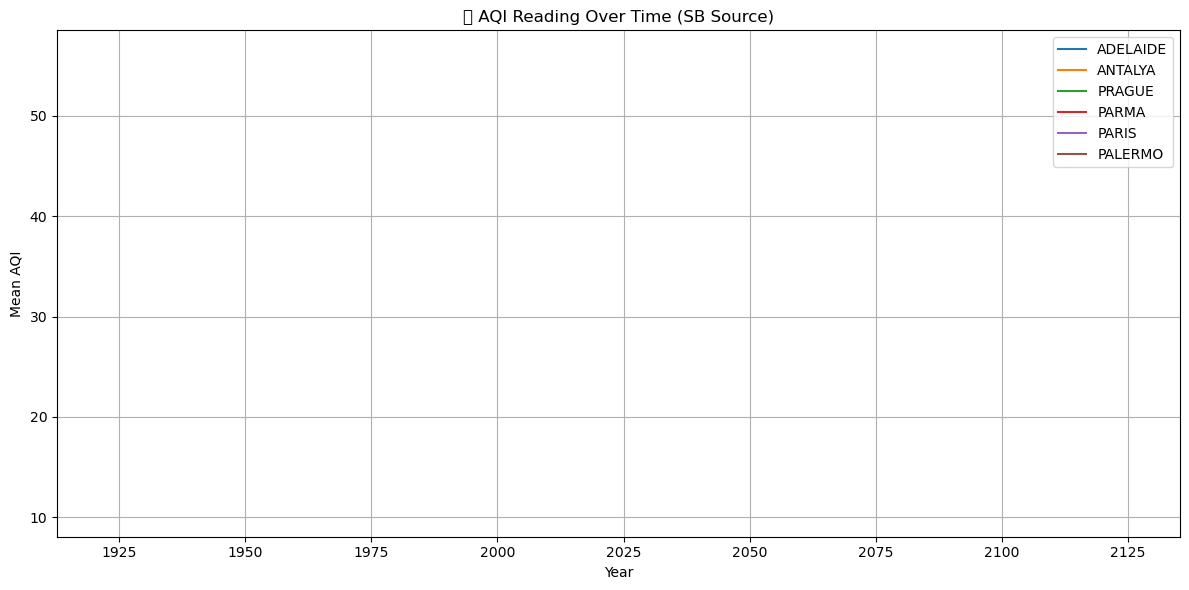

In [11]:
# 📈 3. AQI trend over years by city
# We'll use both sb and catapult sources separately
aqi_yearly = df.groupby(["City", "Year_sb"])["AQI Reading_sb"].mean().reset_index()
aqi_catapult_yearly = df.groupby(["City", "Year_catapult"])["AQI Reading_catapult"].mean().reset_index()

# Plot a few major cities to avoid clutter
top_cities = aqi_yearly['City'].value_counts().head(6).index

plt.figure(figsize=(12, 6))
for city in top_cities:
    subset = aqi_yearly[aqi_yearly['City'] == city]
    plt.plot(subset["Year_sb"], subset["AQI Reading_sb"], label=city)

plt.title("📉 AQI Reading Over Time (SB Source)")
plt.xlabel("Year")
plt.ylabel("Mean AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\samer\AppData\Local\Temp\ipykernel_26780\906608326.py:14: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  plt.tight_layout()
c:\Users\samer\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


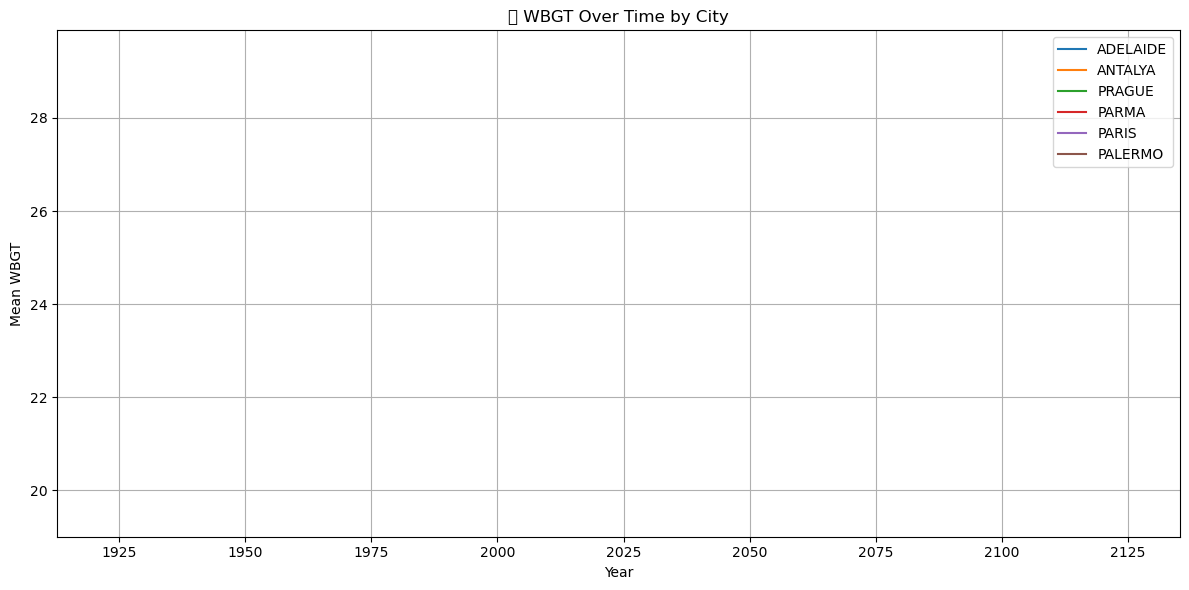

In [12]:
# 📈 4. WBGT trend over years by city
wbgt_yearly = df.groupby(["City", "Year_sb"])["WBGT"].mean().reset_index()

plt.figure(figsize=(12, 6))
for city in top_cities:
    subset = wbgt_yearly[wbgt_yearly["City"] == city]
    plt.plot(subset["Year_sb"], subset["WBGT"], label=city)

plt.title("🌡️ WBGT Over Time by City")
plt.xlabel("Year")
plt.ylabel("Mean WBGT")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()